# Cas test debit

In [1]:
from trustutils import run

run.introduction("G. F.")
run.description("Calculs menes en VEF ou VDF.")
run.TRUST_parameters()

## Introduction 
 Validation made by : G. F.



 Report generated 26/01/2022

### Description 
Calculs menes en VEF ou VDF.

### TRUST parameters 
 * Version TRUST: 1.8.4
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/jupyter/Verification_codage/debit_impose/build)

In [2]:
from trustutils import run 
c1 = run.addCase(".","test_opt.data",nbProcs=1)
c2 = run.addCase(".","test_opt2.data",nbProcs=1)
c3 = run.addCase(".","test_opt3.data",nbProcs=1)
c4 = run.addCase(".","Champ_front_debit.data",nbProcs=1)
c5 = run.addCase(".","champ_normal_var.data",nbProcs=1)
run.printCases()
run.runCases()

### Test cases 
* ./test_opt.data : 
* ./test_opt2.data : 
* ./test_opt3.data : 
* ./Champ_front_debit.data : 
* ./champ_normal_var.data : 


Running **with Sserver**...
  => A total of 5 cases were (successfully) run in 1.5s.


### References
* moi_meme

## VEF test:  calculated flow rate

In [3]:
from trustutils import plot
import numpy as np

columns=["temps",'debit']
Table=plot.Table(columns)  

data=plot.loadText("test_opt_pb_Debit.out",transpose=False)
data[-1][4] = -data[-1][4]
Table.addLigne([data[-1][0:5:4]],"Calcul")

data=plot.loadText("test_opt2_pb_Debit.out",transpose=False)
data[-1][4] = -data[-1][4]
Table.addLigne([data[-1][0:5:4]],"Calcul avec champ_input")

data=plot.loadText("test_opt3_pb_Debit.out",transpose=False)
data[-1][4] = -data[-1][4]
Table.addLigne([data[-1][0:5:4]],"Calcul avec champ_front_fonc_txyz")

data=plot.loadText("champ_normal_var_pb_Debit.out",transpose=False)
data[-1][4] = -data[-1][4]
Table.addLigne([data[-1][0:5:4]],"Calcul avec Boundary_field_inward variable")

Table.addLigne([[10,5.]],"voulu") 
Table.df

,temps,debit
Calcul,10.0,5.00000
Calcul avec champ_input,10.0,5.00000
Calcul avec champ_front_fonc_txyz,10.0,5.00000
Calcul avec Boundary_field_inward variable,10.0,4.99999
voulu,10.0,5.00000


### Visualization of the velocity field on boundary IN 

The velocity should be uniform even if the surfaces are different.

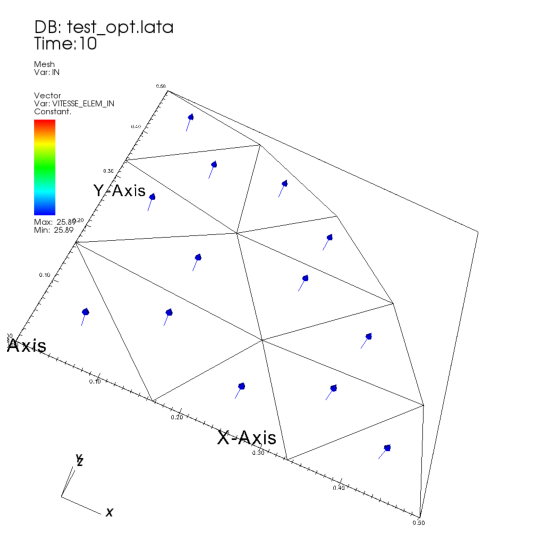

In [4]:
from trustutils import visit 

a = visit.Show("./test_opt.lata","Vector","VITESSE_ELEM_IN",mesh="IN")
a.normal3D([-0.0543768,-0.677396,0.733606])
a.up3D([-0.407612, 0.685749,0.602993])
a.plot()

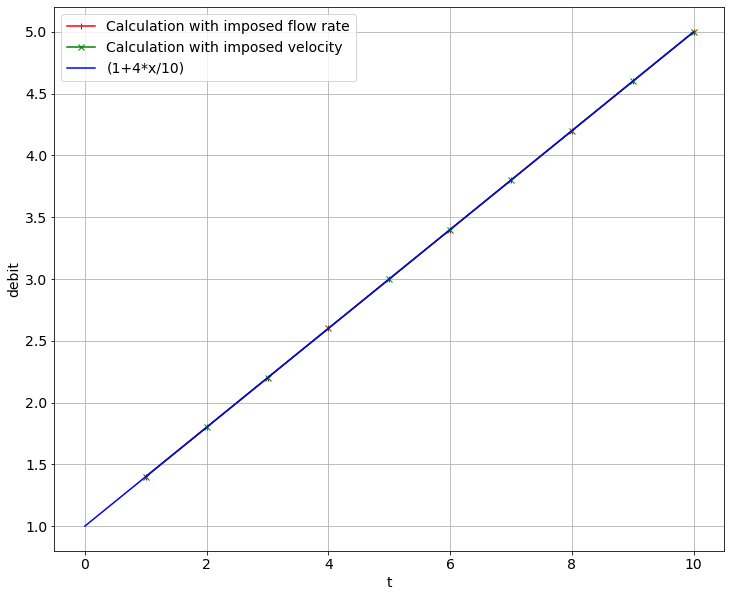

In [5]:
from trustutils import plot
import numpy as np

Graphique=plot.Graph()
data=plot.loadText("test_opt3_pb_Debit.out")
Graphique.add(data[0],-data[4],marker="-|",color="r",label="Calculation with imposed flow rate")
data=plot.loadText("champ_normal_var_pb_Debit.out")
Graphique.add(data[0],-data[4],marker="-x",color="g",label="Calculation with imposed velocity")
x=np.linspace(0,10,10)
y = 1.+4.*x/10.
Graphique.add(x,y,marker="-",color="b",label="(1+4*x/10)")
Graphique.label("t","debit")


### VDF test:  calculated flow rate

In [10]:
from trustutils import plot

columns=["temps",'debit']
Table=plot.Table(columns)  
data=plot.loadText("Champ_front_debit_pb_Debit.out",transpose=False)
data[2][1] = -data[2][1]
Table.addLigne([data[2][0:2]],"Calculation with imposed flow rate")
data=plot.loadText("testCL_pb_Debit.out",transpose=False) 
data[2][1] = -data[2][1]
Table.addLigne([data[2][0:2]],"Calculation with imposed velocity") 
Table.addLigne([[1.2,5.]],"voulu") 
Table.df

,temps,debit
Calculation with imposed flow rate,1.199998,5.0
Calculation with imposed velocity,1.199998,5.0
voulu,1.200000,5.0


## Data Files

### test_opt

In [7]:
run.dumpDataset("./test_opt.data") 

 # Hydraulique 2D laminaire avec "trou" dans le maillage #
 # PARALLEL OK #
 dimension 3
 Pb_hydraulique pb
 Domaine dom
 
 # BEGIN MESH #
 Read_file dom dom.geom
 # END MESH #
 # BEGIN PARTITION
 
 Partition dom
 {
 	 Partition_tool tranche { tranches 2 1 1 }  
 	 Larg_joint 2
 	 zones_name DOM
 }
 End
 END PARTITION #
 
 # BEGIN SCATTER
 Scatter DOM.Zones dom
 END SCATTER #
 
 VEFprep1b dis
 
 
 Scheme_euler_explicit sch
 Read sch
 {
         tinit 0
         dt_min 5.e-8
         dt_impr 5.e-1
         
         seuil_statio -1.e-6
 	 nb_pas_dt_max 10
 	 dt_max 1
 }
 
 Fluide_Incompressible eau
 Read eau
 {
 	 mu  Champ_uniforme 1 1.
 	 rho Champ_Uniforme 1 1000.
 }
 
 Associate pb dom
 Associate pb sch
 Associate pb eau
 
 
 
 Discretize pb dis
 domaine IN
 extraire_surface { probleme pb domaine IN avec_certains_bords 1 IN } 
 Read pb
 {
 	 Navier_Stokes_standard
 	 {
 methode_calcul_pression_initiale avec_sources
 	 	 solveur_pression GCP { 
 	 	 	 precond ssor { omega 1.5 } 
 	 	